In [1]:
# My favorites inports
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'
pl.rcParams['figure.figsize'] = ( 7 , 4.5 )
pl.rcParams.update( {'font.size': 14} )

# Importing my module
from Fit_Functions import fit_function, poly_fit

## <center> Fitting Polynomial Plots using poly_fit
    
All of functions inputs and their meaning

```python
def poly_fit(xdata, ydata, n=1, pc='k:', dc='bo', title='Function', ylab='f(x)', xlab='x', 
    yerr=None, xerr=None, dps=5, elc='k', elw=1.5, cs=5, param_return=False, p_func=False, p_cov=False)
```
    
Here ```n``` is the number of parameters that are allowed to vary. ```pc``` is the plot's line color, and ```dc``` is the dot color of the data points. ```title```, ```xlab```, and ```ylab``` are the labels associated with the given plot; Note that leaving ```title="Function"``` will output the fitting function as the title. ```yerr``` and ```xerr``` is the Uncertainties measured in each of those parameters. ```dps``` is the dot size, ```elc``` is the error line color, ```elw``` is the error line width, and ```cs``` is the capsize of the error bars. ```param_return``` will make the function output the coefficients and their uncertainties as two usable lists, ```p_func``` will print the fitted function, and ```p_cov``` will print the covariance matrix

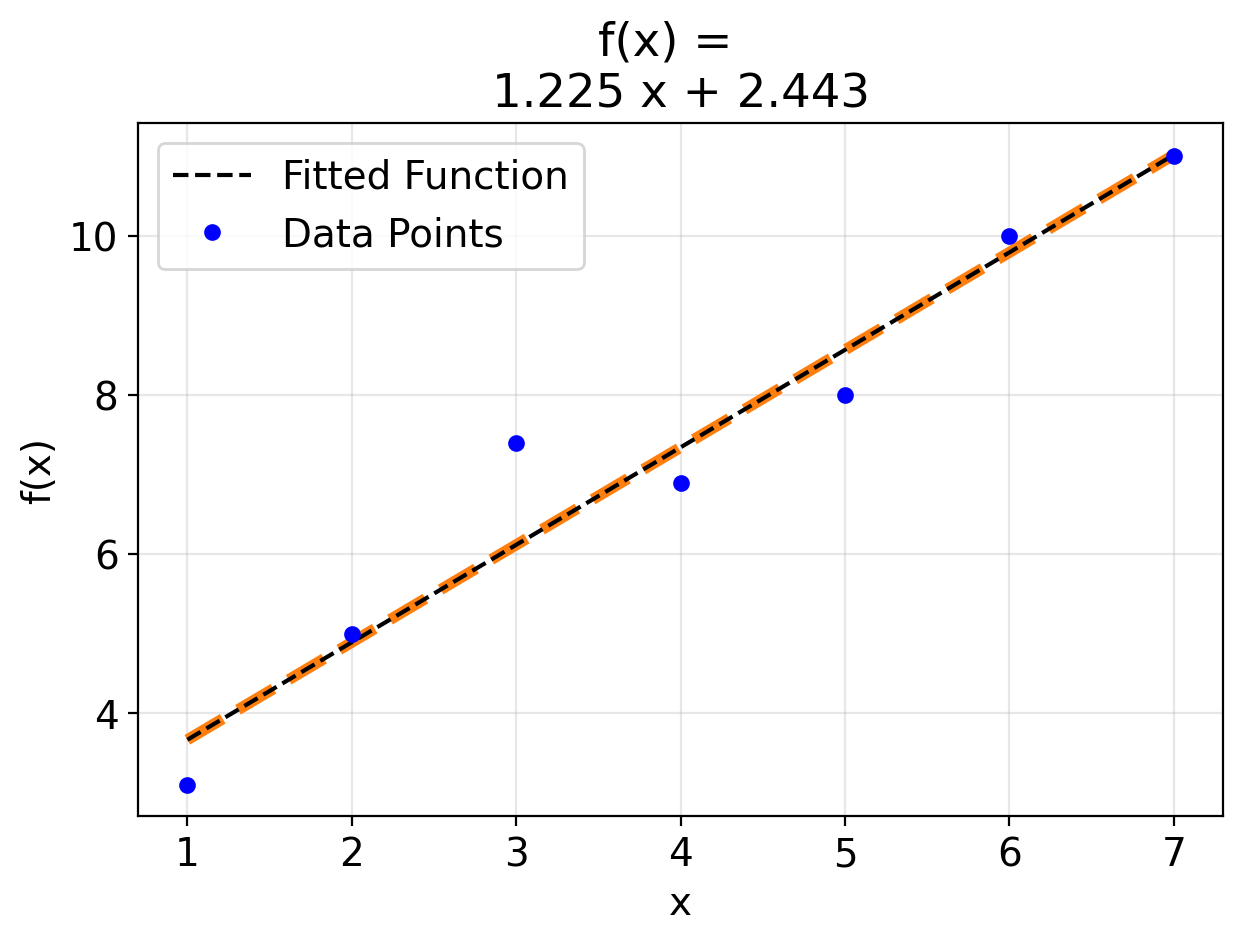

Parameter 0 = 1.225 +/- 0.1346859536939508
Parameter 1 = 2.4428571428571404 +/- 0.6023338961481259


In [2]:
# Test Trial Data
x_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [3.1, 5, 7.4, 6.9, 8, 10, 11]

# Just getting the parameters out of the function
param, param_error = poly_fit( x_data , y_data , param_return=True )
y = param[0] * np.array(x_data) + param[1]

# plotting
pl.plot( x_data, y, 'C1--', linewidth=4)

# purely using the function to plot
poly_fit( x_data , y_data )

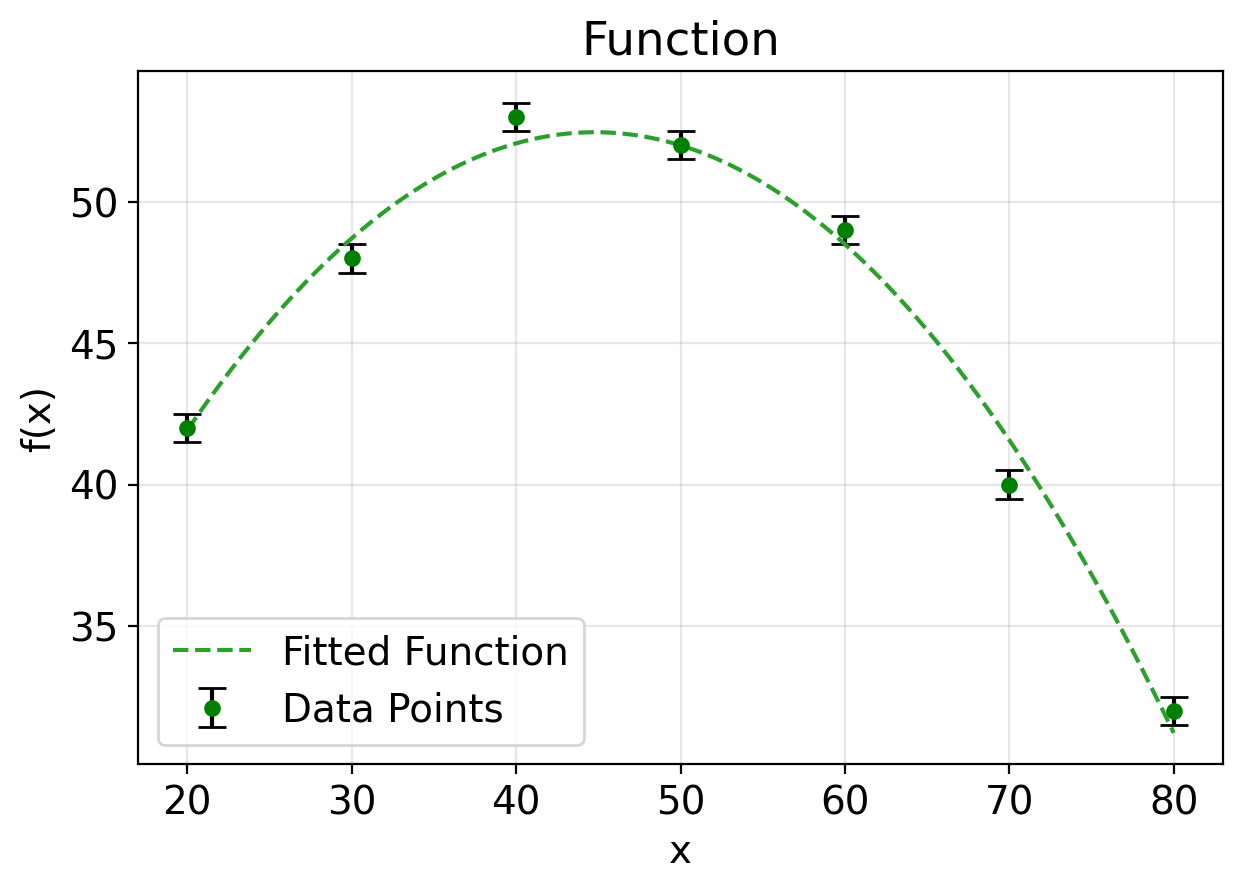

Parameter 0 = -0.017142857142857175 +/- 0.001184508853698361
Parameter 1 = 1.5357142857142898 +/- 0.12021451914076355
Parameter 2 = 18.07142857142844 +/- 2.721794126179676


In [3]:
x_data = [20, 30, 40, 50, 60, 70, 80]
y_data = [42, 48, 53, 52, 49, 40, 32]
y_err = [0.5 for i in range(len(x_data))]


poly_fit( x_data , y_data, n=2, pc='C2--', dc='go', title='Function', ylab='f(x)', xlab='x',
           yerr=y_err, xerr=None, dps=5, cs=5, p_func=False, p_cov=False )

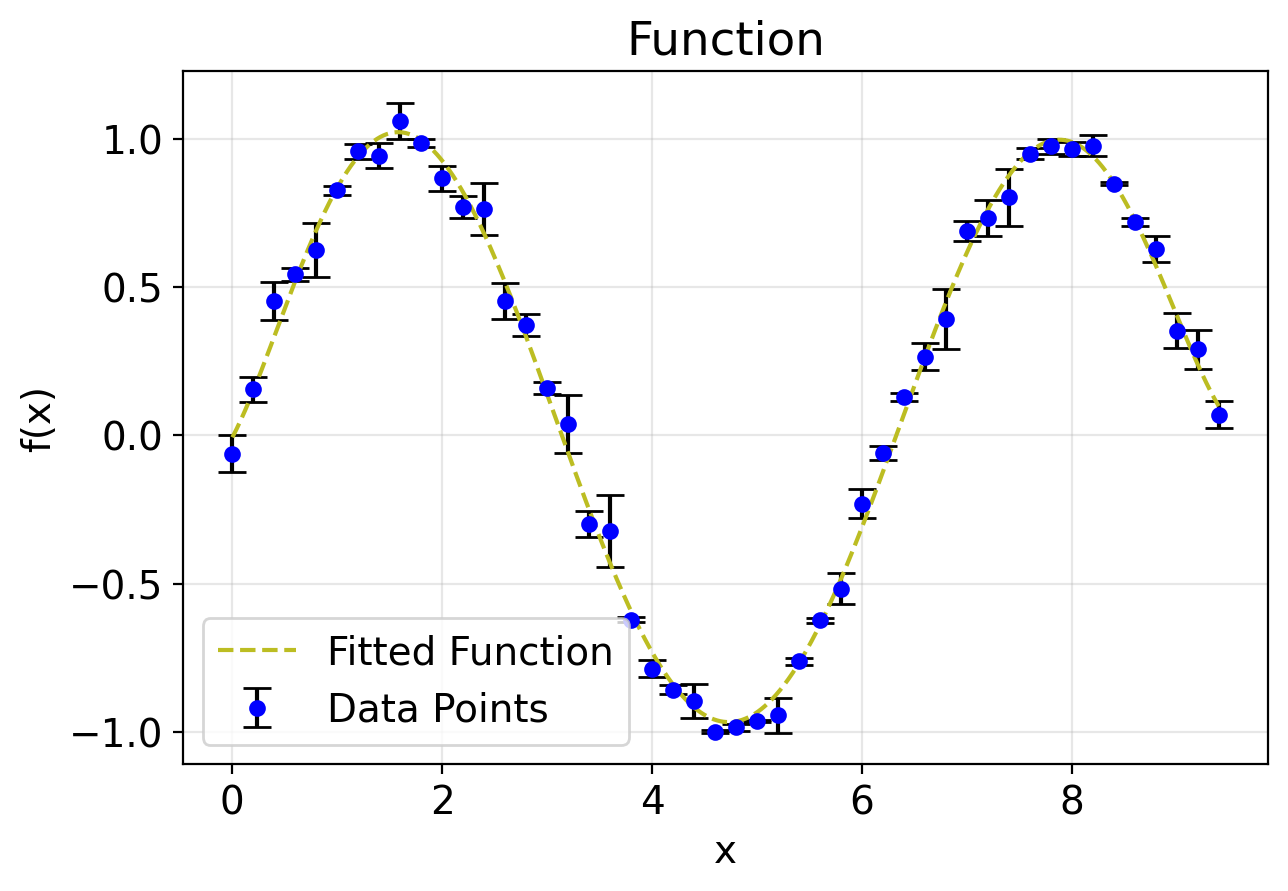

Parameter 0 = 0.0006133560610413482 +/- 3.450730187899545e-05
Parameter 1 = -0.017346795138268742 +/- 0.000976593009508051
Parameter 2 = 0.17218693862353476 +/- 0.010536297934342843
Parameter 3 = -0.6759604573611623 +/- 0.05395988250809814
Parameter 4 = 0.6882904772107398 +/- 0.13245407645708368
Parameter 5 = 0.6738705802749324 +/- 0.1373393413340551
Parameter 6 = -0.006218455930710584 +/- 0.044221369851754296

Covariance Matrix:


Matrix([
[ 1.19075388296812e-9,  -3.35792594996147e-8,   3.57312765171097e-7,  -1.77237436958224e-6,    4.0640696754362e-6, -3.59370852061182e-6,  6.37629842813074e-7],
[-3.35792594995897e-8,   9.53733906219992e-7,  -1.02359915036407e-5,   5.13092893783361e-5, -0.000119218836226457, 0.000107284946961503, -1.95703313316091e-5],
[ 3.57312765170474e-7,  -1.02359915036306e-5,  0.000111013574161237, -0.000563792611058394,   0.00133231483403298, -0.00122701900781186, 0.000232509269816242],
[-1.77237436957666e-6,   5.13092893782155e-5, -0.000563792611057642,   0.00291166892028776,  -0.00703645155616022,  0.00669116951680796, -0.00134038978450422],
[  4.0640696754148e-6, -0.000119218836225937,   0.00133231483402865,  -0.00703645155614725,     0.017544082370099,   -0.017492697256623,  0.00383033950909335],
[-3.59370852058021e-6,  0.000107284946960683,  -0.00122701900780416,    0.0066911695167771,   -0.0174926972565782,   0.0188620946780721, -0.00487855482295815],
[ 6.37629842802638e-7,  -1.9570

In [4]:
time = np.arange( 0 , 3 * np.pi , 0.2 )
data_uncertainty = np.random.normal(loc=0.0, scale=0.05, size=len(time))
data = np.sin(time) + data_uncertainty


poly_fit( time , data, n=6, pc='C8--', dc='bo', title='Function', ylab='f(x)', xlab='x',
        yerr=data_uncertainty, xerr=None, dps=5, cs=5, p_func=False, p_cov=True )

## <center> Fitting Curve Plots using fit_funtion
    
All of functions inputs and their meaning
```python
    def fit_function(xdata, ydata, func, n=3, yerr=None, xerr=None, p0=None, pc='k', dc='C3o',
                     title='Function', ylab='f(x)', xlab='x', bounds=(-np.inf, np.inf), dps=5,
                     elc='k', elw=1.5, cs=5,  maxfew=800, param_return=False, cov_show=False, chi_show=False):
```
Here ```n``` is the number of parameters that are allowed to vary. ```yerr``` and ```xerr``` is the uncertainties measured in each of those parameters. ```pc``` is the plot's line color, and ```dc``` is the dot color of the data points. ```title```, ```xlab```, and ```ylab``` are the labels associated with the given plot.```dps``` is the dot size, ```elc``` is the error line color, ```elw``` is the error line width, and ```cs``` is the capsize of the error bars. ```param_return``` will make the function output the coefficients and their uncertainties as two usable lists, ```p_func``` will print the fitted function, ```p_cov``` will print the covariance matrix, and ```chi_show``` prints $\chi^2$'s value of the fitted function as well as the reduced $\chi^2$ squared value.

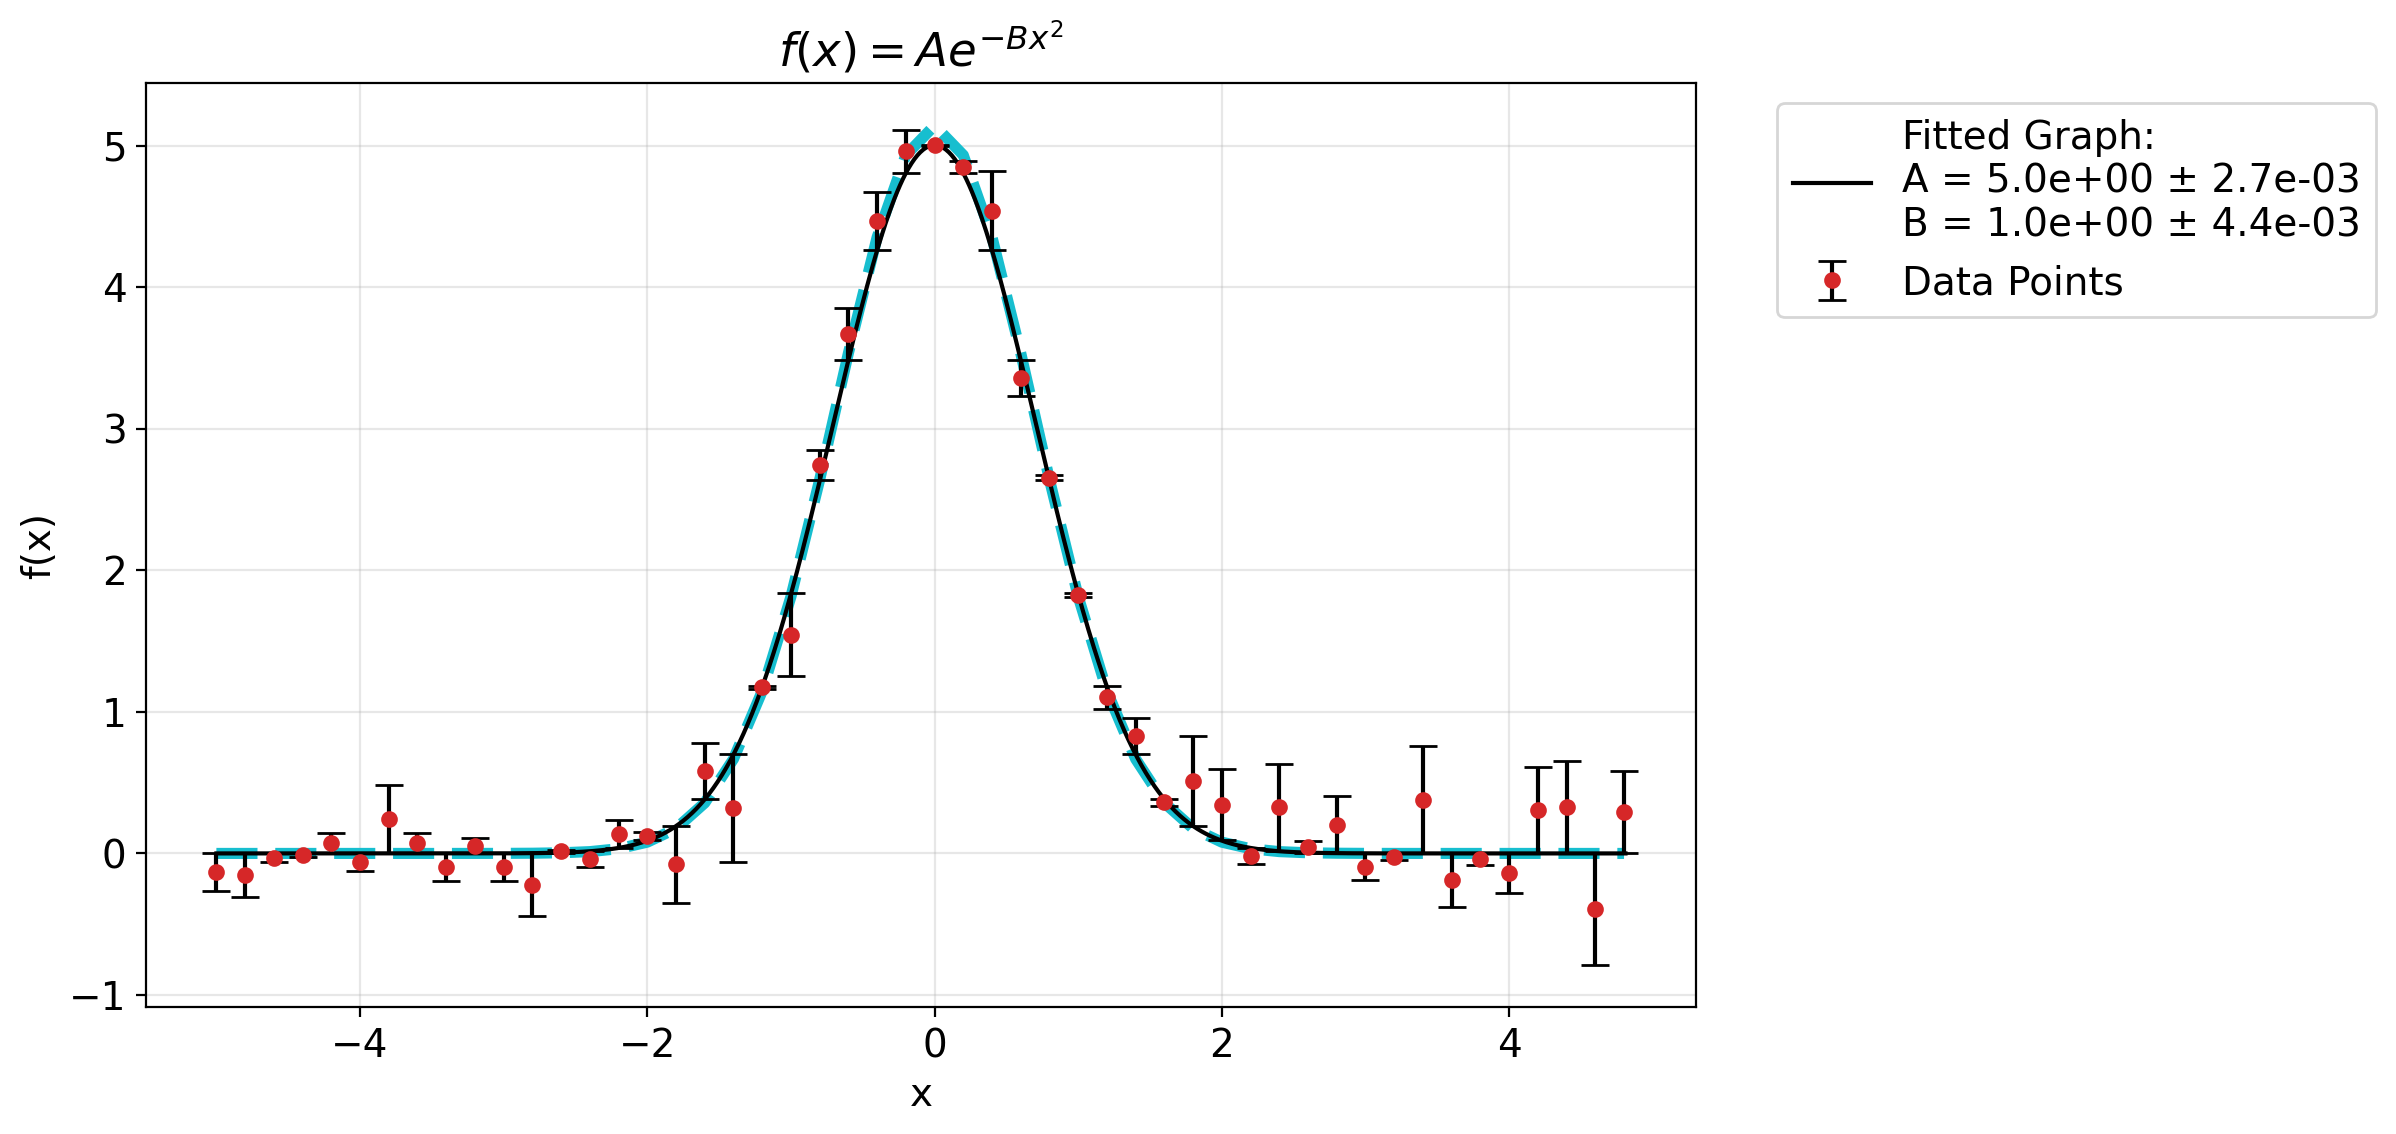

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
# Function Test Parameters 2
def guass_func(x, A, B): return A * np.exp( - B * x ** 2 )

x_test = np.arange( -5 , 5 , 0.2 )
y_test = guass_func( x_test , A=5 , B=1 )

data_err = np.random.normal(loc=0.0, scale=0.2, size=len(x_test))

y_test = y_test + data_err
data = {'Time (s)': x_test, 'Temperature (K)': y_test}

#display( pd.DataFrame(data) )
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
#df = pd.read_csv("filename.csv")


pl.figure( figsize=(10,6) )
params, params_error = fit_function( data['Time (s)'], data['Temperature (K)'], guass_func, n=2, param_return=True)

# plotting
pl.plot( x_test, guass_func(x_test, params[0], params[1]), 'C9--', linewidth=4)
fit_function( data['Time (s)'], data['Temperature (K)'], guass_func, n=2, yerr=data_err, title=r'$f(x) = Ae^{-Bx^2}$')

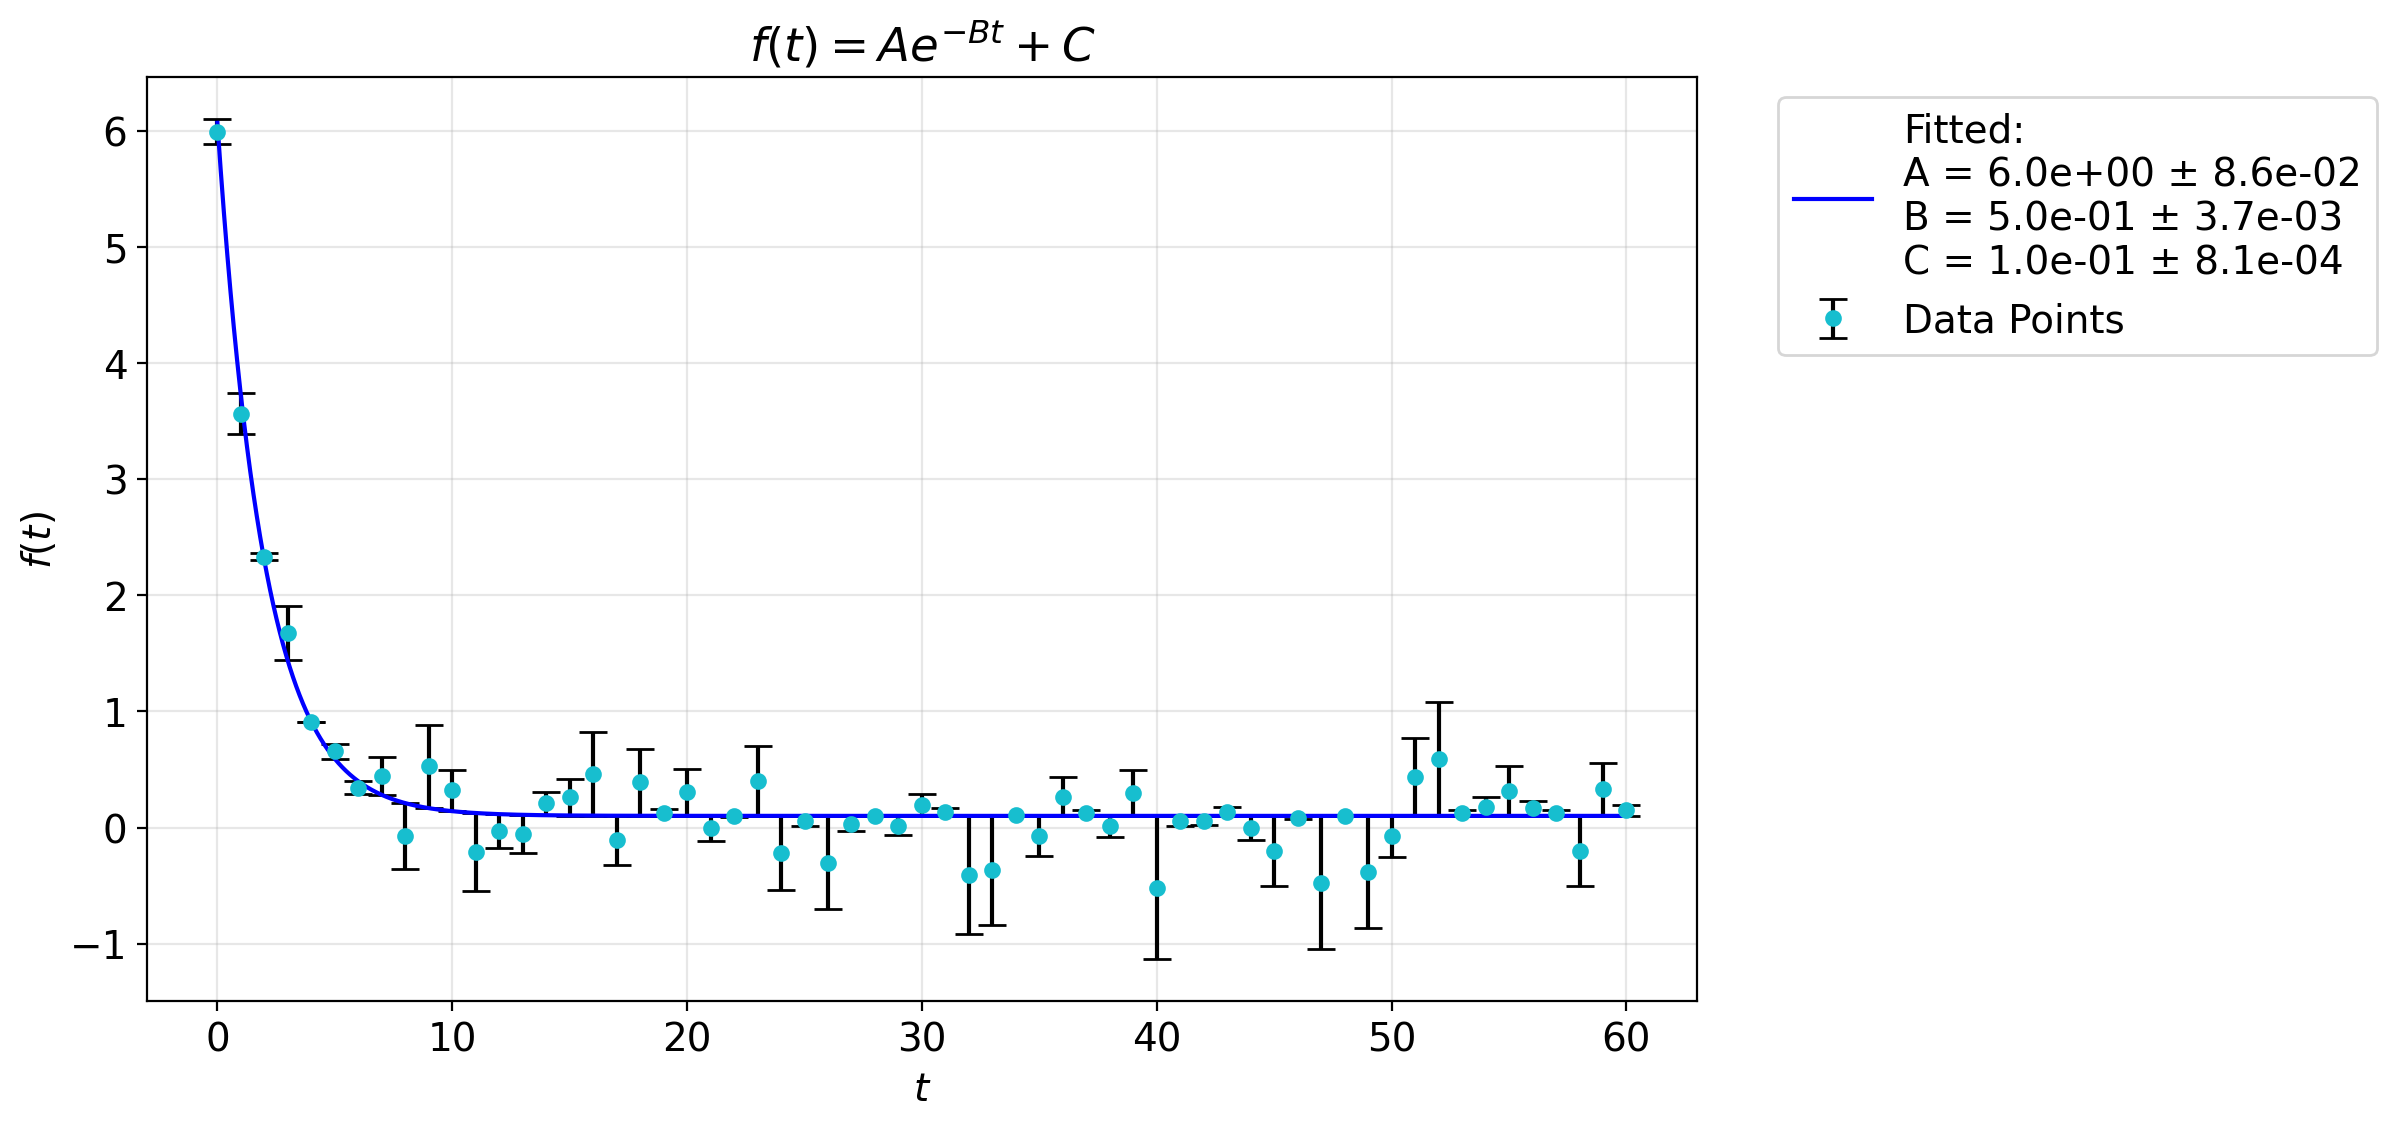

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
# Function Test Parameters 3
from numpy import inf
def exponential_decay(t, A, B, C): return A * np.exp( - B * t ) + C

x_test = np.arange( 0 , 60 + 1 , 1 )
y_test = exponential_decay( x_test , A=6 , B=0.5 , C=0.1 )

data_err = np.random.normal(loc=0.0, scale=0.25, size=len(x_test))
y_test = y_test + data_err
data = {'Time (s)': x_test, 'Temperature (K)': y_test}

#display( pd.DataFrame(data) )
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
#df = pd.read_csv("filename.csv")

pl.figure( figsize=(10,6) )
fit_function( x_test, y_test, exponential_decay, n=3, yerr=data_err, xerr=None, p0=None, pc='b', dc='C9o',
        title=r'$f(t) = Ae^{-Bt} + C$', ylab=r'$f(t)$', xlab=r'$t$', bounds=(0, np.inf), dps=5,
             elc='k', elw=1.5, cs=5, maxfew=1600, param_return=False, cov_show=False, chi_show=False)

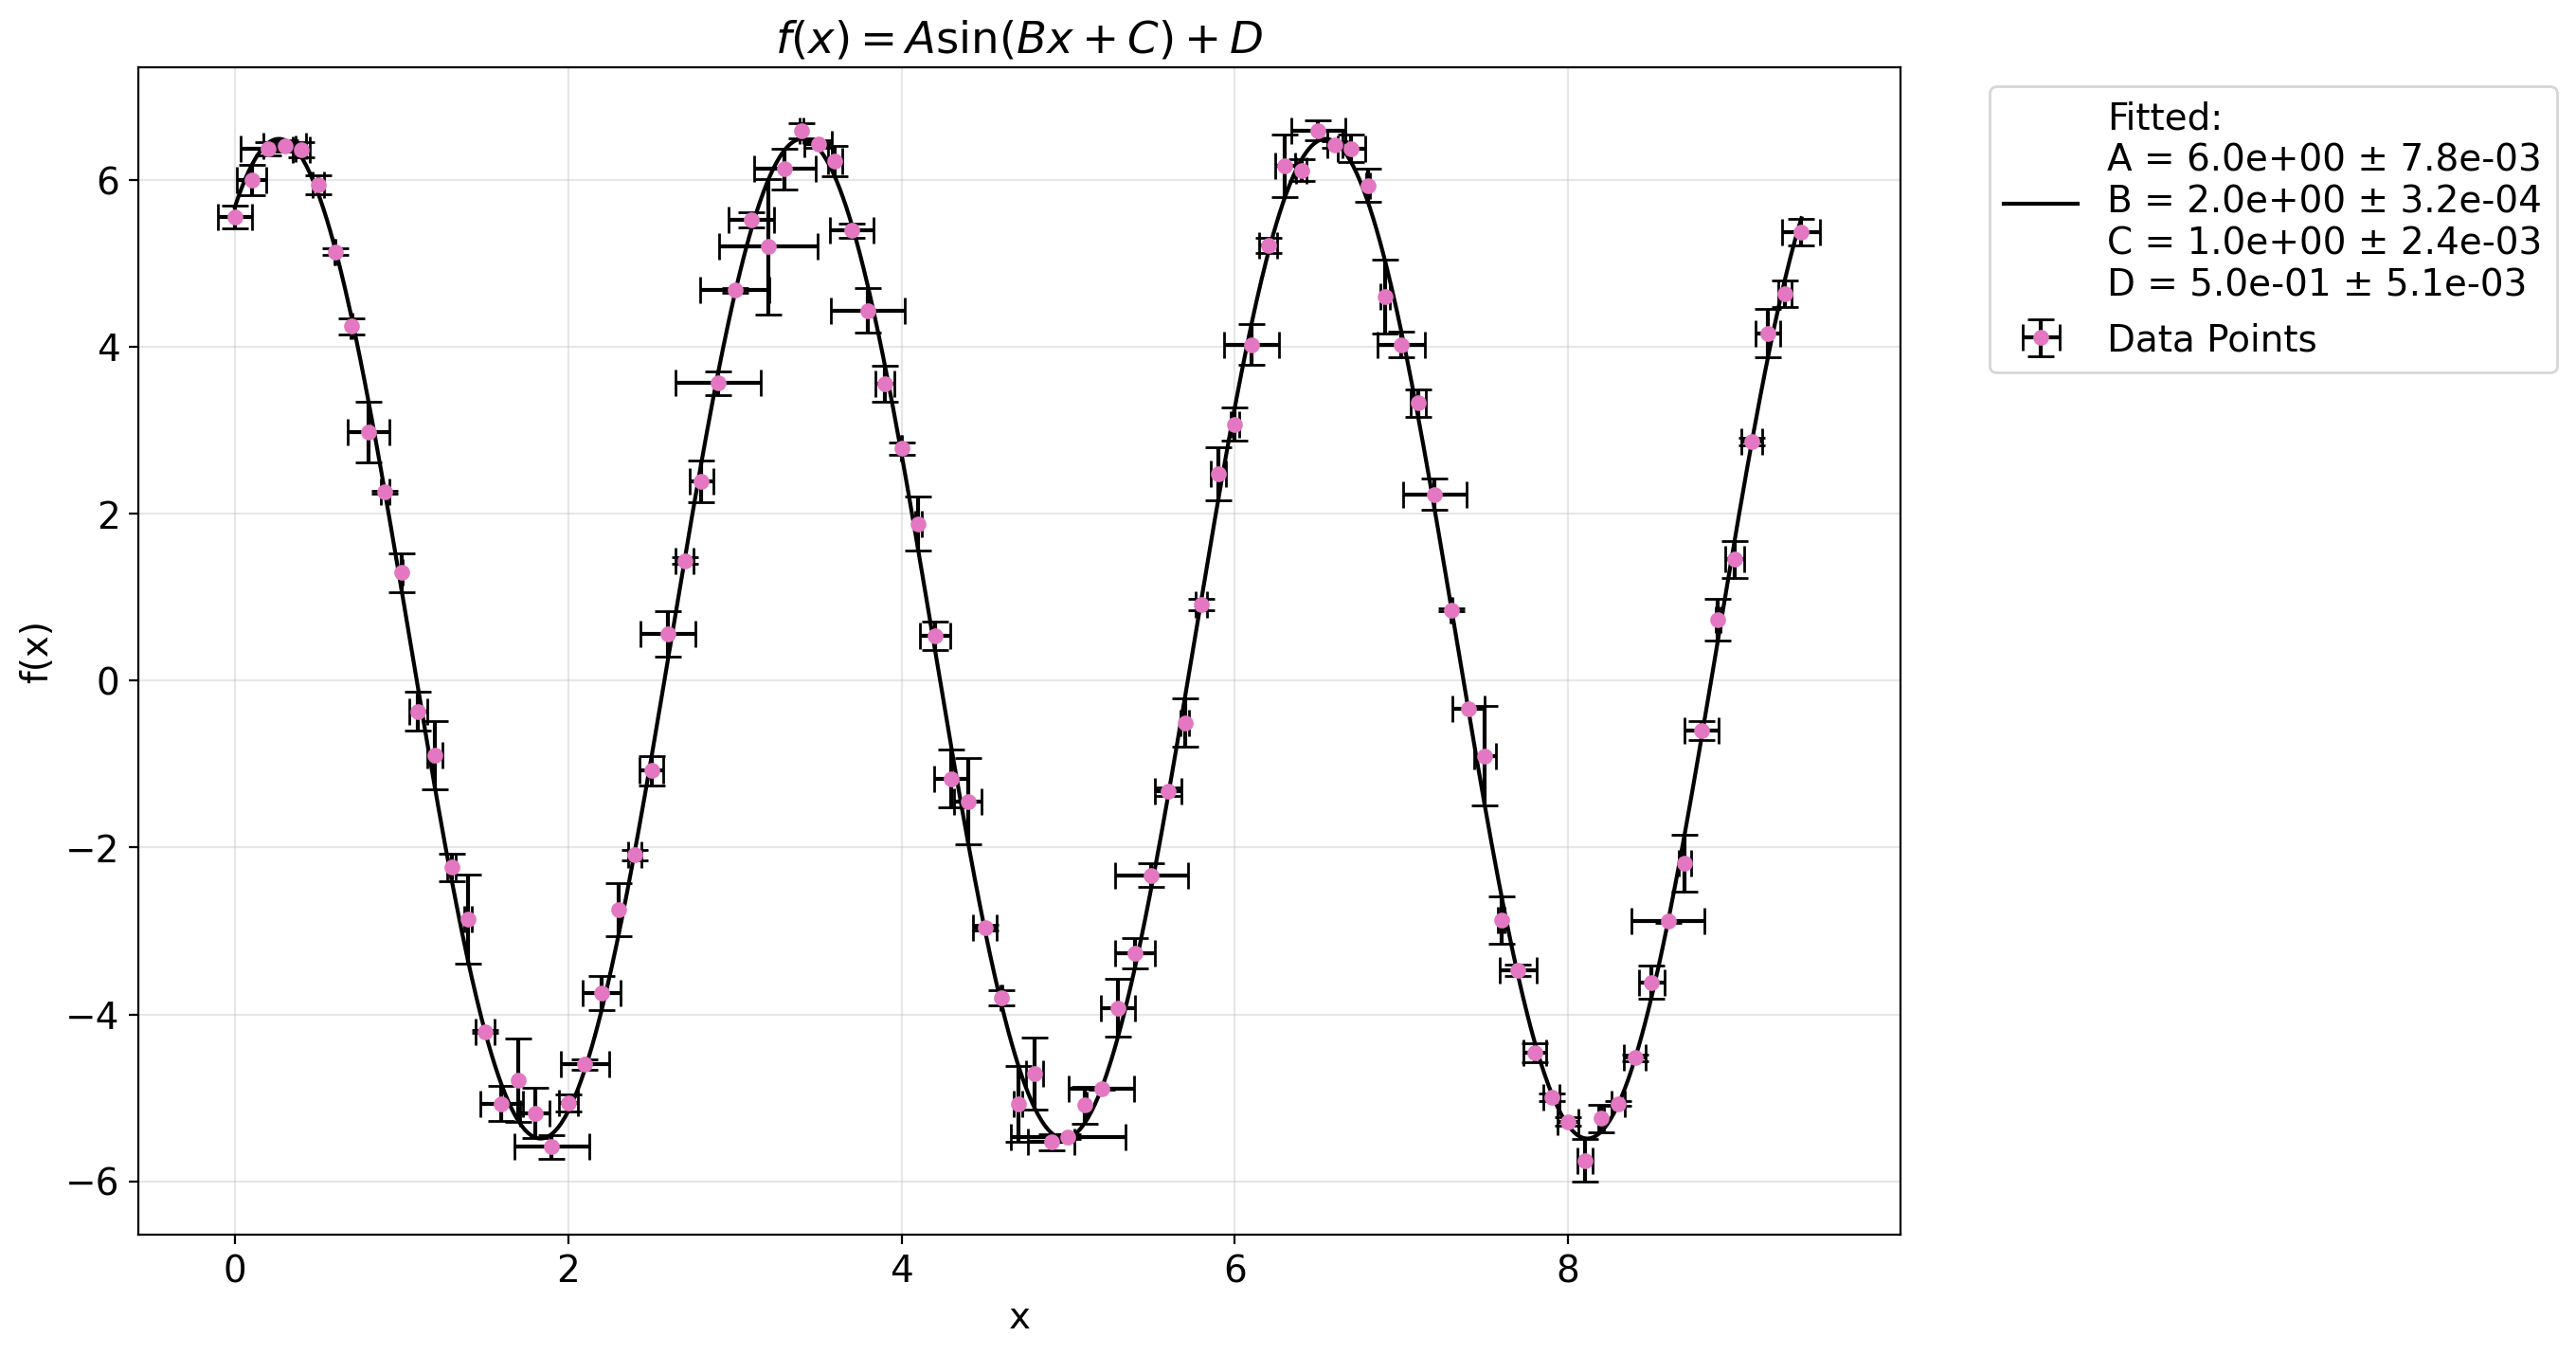

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Covariance Matrix:


Matrix([
[6.08663544055704e-5,  -3.7684362504266e-8,  3.97214717908268e-6, 3.04071867985684e-5],
[-3.7684362504266e-8,  1.05212064719825e-7, -7.38798323657782e-7, 2.30675209389153e-7],
[3.97214717908268e-6, -7.38798323657782e-7,   5.6918425641482e-6, 1.88782700747187e-6],
[3.04071867985684e-5,  2.30675209389153e-7,  1.88782700747187e-6, 2.55730672160605e-5]])

In [7]:
# Function Test Parameters 4
from numpy import inf
def sinusoidal(x, A, B, C, D): return A * np.sin( B * x + C) + D

x_test = np.arange(0 , 3 * np.pi , 0.1)
y_test = sinusoidal(x_test, A=6, B=2, C=np.pi/3, D= 0.5)

data_err = np.random.normal(loc=0.0, scale=0.25, size=len(x_test))
data_err_x = np.random.normal(loc=0.0, scale=0.1, size=len(x_test))

y_test = y_test + data_err

#data = {'Time (s)': x_test, 'Temperature (K)': y_test}
#display( pd.DataFrame(data) )
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
#df = pd.read_csv("filename.csv")

pl.figure( figsize=(12,8) )
fit_function( x_test, y_test, sinusoidal, n=4, yerr=data_err, xerr=data_err_x, p0=[6, 2, np.pi/2, 0.1],
             pc='k', dc='C6o', title=r'$f(x) = A\sin(B x + C) + D$', bounds=(0, np.inf), dps=5,
             elc='k', elw=1.5, cs=5, maxfew=1600, param_return=False, cov_show=True, chi_show=True)